In [1]:
import pandas, numpy , seaborn, re
import matplotlib.pyplot as pyplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
cf.go_offline()

In [6]:
# Create a string variable to make imports easier
base_string = "Stack overflow {0}/developer_survey_{0}/survey_results_{1}.csv"

In [7]:
#import the 2019 data
so_2019 = pandas.read_csv(base_string.format(2019, "public"))
so_2019.head()

Respondent                                         MainBranch Hobbyist  \
0           1             I am a student who is learning to code      Yes   
1           2             I am a student who is learning to code       No   
2           3  I am not primarily a developer, but I write co...      Yes   
3           4                     I am a developer by profession       No   
4           5                     I am a developer by profession      Yes   

                  OpenSourcer  \
0                       Never   
1     Less than once per year   
2                       Never   
3                       Never   
4  Once a month or more often   

                                          OpenSource  \
0  The quality of OSS and closed source software ...   
1  The quality of OSS and closed source software ...   
2  The quality of OSS and closed source software ...   
3  The quality of OSS and closed source software ...   
4  OSS is, on average, of HIGHER quality than pro...   

                               Employment                 Country  \
0  Not employed, and not looking for work          United Kingdom   
1      Not employed, but looking for work  Bosnia and Herzegovina   
2                      Employed full-time                Thailand   
3                      Employed full-time           United States   
4                      Employed full-time                 Ukraine   

          Student                                            EdLevel  \
0              No                          Primary/elementary school   
1  Yes, full-time  Secondary school (e.g. American high school, G...   
2              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
3              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4              No           Bachelor’s degree (BA, BS, B.Eng., etc.)   

                                      UndergradMajor  \
0                                                NaN   
1                                                NaN   
2                      Web development or web design   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

              ...                                        WelcomeChange  \
0             ...              Just as welcome now as I felt last year   
1             ...              Just as welcome now as I felt last year   
2             ...              Just as welcome now as I felt last year   
3             ...              Just as welcome now as I felt last year   
4             ...              Just as welcome now as I felt last year   

                                        SONewContent   Age Gender Trans  \
0  Tech articles written by other developers;Indu...  14.0    Man    No   
1  Tech articles written by other developers;Indu...  19.0    Man    No   
2  Tech meetups or events in your area;Courses on...  28.0    Man    No   
3  Tech articles written by other developers;Indu...  22.0    Man    No   
4  Tech meetups or events in your area;Courses on...  30.0    Man    No   

                 Sexuality                                 Ethnicity  \
0  Straight / Heterosexual                                       NaN   
1  Straight / Heterosexual                                       NaN   
2  Straight / Heterosexual                                       NaN   
3  Straight / Heterosexual              White or of European descent   
4  Straight / Heterosexual  White or of European descent;Multiracial   

  Dependents           SurveyLength                  SurveyEase  
0         No  Appropriate in length  Neither easy nor difficult  
1         No  Appropriate in length  Neither easy nor difficult  
2        Yes  Appropriate in length  Neither easy nor difficult  
3         No  Appropriate in length                        Easy  
4         No  Appropriate in length                        Easy  

[5 rows x 85 columns]

In [15]:
schema_2019 = pandas.read_csv(base_string.format(2019, "schema"))
print(schema_2019)


            Column                                       QuestionText
0       Respondent  Randomized respondent ID number (not in order ...
1       MainBranch  Which of the following options best describes ...
2         Hobbyist                            Do you code as a hobby?
3      OpenSourcer        How often do you contribute to open source?
4       OpenSource  How do you feel about the quality of open sour...
5       Employment  Which of the following best describes your cur...
6          Country          In which country do you currently reside?
7          Student  Are you currently enrolled in a formal, degree...
8          EdLevel  Which of the following best describes the high...
9   UndergradMajor  What was your main or most important field of ...
10        EduOther  Which of the following types of non-degree edu...
11         OrgSize  Approximately how many people are employed by ...
12         DevType  Which of the following describe you? Please se...
13       YearsCode  

In [9]:
#import the 2018 data
so_2018 = pandas.read_csv(base_string.format(2018, "public"))
schema_2018 = pandas.read_csv(base_string.format(2018, "schema"))
so_2018.head()

c:\python\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.



Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology, chemistry, phy...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

                CompanySize  \
0        20 to 99 employees   
1  10,000 or more employees   
2        20 to 99 employees   
3      100 to 499 employees   
4  10,000 or more employees   

                                             DevType      ...        \
0                               Full-stack developer      ...         
1  Database administrator;DevOps specialist;Full-...      ...         
2           Engineering manager;Full-stack developer      ...         
3                               Full-stack developer      ...         
4  Data or business analyst;Desktop or enterprise...      ...         

                     Exercise Gender         SexualOrientation  \
0        3 - 4 times per week   Male  Straight or heterosexual   
1   Daily or almost every day   Male  Straight or heterosexual   
2                         NaN    NaN                       NaN   
3  I don't typically exercise   Male  Straight or heterosexual   
4        3 - 4 times per week   Male  Straight or heterosexual   

                                    EducationParents  \
0           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2                                                NaN   
3  Some college/university study without earning ...   
4  Some college/university study without earning ...   

                  RaceEthnicity                Age Dependents  MilitaryUS  \
0   Black or of African descent  25 - 34 years old        Yes         NaN   
1  White or of European descent  35 - 44 years old        Yes         NaN   
2                           NaN                NaN        NaN         NaN   
3  White or of European descent  35 - 44 years old         No          No   
4  White or of European descent  18 - 24 years old        Yes         NaN   

                          SurveyTooLong     SurveyEasy  
0  The survey was an appropriate length      Very easy  
1  The survey was an appropriate length  Somewhat easy  
2                                   NaN            NaN  
3  The survey was an appropriate length  Somewhat easy  
4  The survey was an appropriate length  Somewhat easy  

[5 rows x 129 columns]

###   The "Salary" column for 2018 is stored as a string.  This has to be wrangled to make it a numerical value

In [10]:

so_2018["Salary"] = so_2018["Salary"].str.replace(",", "").astype(float)

In [11]:
so_2018["Salary"].head()

0         NaN
1     51000.0
2         NaN
3         NaN
4    260000.0
Name: Salary, dtype: float64

In [18]:
schema_2018

Column  \
0                     Respondent   
1                          Hobby   
2                     OpenSource   
3                        Country   
4                        Student   
5                     Employment   
6                FormalEducation   
7                 UndergradMajor   
8                    CompanySize   
9                        DevType   
10                   YearsCoding   
11               YearsCodingProf   
12               JobSatisfaction   
13            CareerSatisfaction   
14                 HopeFiveYears   
15               JobSearchStatus   
16                    LastNewJob   
17                    AssessJob1   
18                    AssessJob2   
19                    AssessJob3   
20                    AssessJob4   
21                    AssessJob5   
22                    AssessJob6   
23                    AssessJob7   
24                    AssessJob8   
25                    AssessJob9   
26                   AssessJob10   
27               AssessBenefits1   
28               AssessBenefits2   
29               AssessBenefits3   
..                           ...   
99             EthicsResponsible   
100          EthicalImplications   
101       StackOverflowRecommend   
102           StackOverflowVisit   
103      StackOverflowHasAccount   
104     StackOverflowParticipate   
105            StackOverflowJobs   
106        StackOverflowDevStory   
107   StackOverflowJobsRecommend   
108  StackOverflowConsiderMember   
109           HypotheticalTools1   
110           HypotheticalTools2   
111           HypotheticalTools3   
112           HypotheticalTools4   
113           HypotheticalTools5   
114                     WakeTime   
115                HoursComputer   
116                 HoursOutside   
117                    SkipMeals   
118             ErgonomicDevices   
119                     Exercise   
120                       Gender   
121            SexualOrientation   
122             EducationParents   
123                RaceEthnicity   
124                          Age   
125                   Dependents   
126                   MilitaryUS   
127                SurveyTooLong   
128                   SurveyEasy   

                                          QuestionText  
0    Randomized respondent ID number (not in order ...  
1                              Do you code as a hobby?  
2           Do you contribute to open source projects?  
3            In which country do you currently reside?  
4    Are you currently enrolled in a formal, degree...  
5    Which of the following best describes your cur...  
6    Which of the following best describes the high...  
7    You previously indicated that you went to a co...  
8    Approximately how many people are employed by ...  
9    Which of the following describe you? Please se...  
10   Including any education, for how many years ha...  
11   For how many years have you coded professional...  
12   How satisfied are you with your current job? I...  
13   Overall, how satisfied are you with your caree...  
14   Which of the following best describes what you...  
15   Which of the following best describes your cur...  
16   When was the last time that you took a job wit...  
17   Imagine that you are assessing a potential job...  
18   Imagine that you are assessing a potential job...  
19   Imagine that you are assessing a potential job...  
20   Imagine that you are assessing a potential job...  
21   Imagine that you are assessing a potential job...  
22   Imagine that you are assessing a potential job...  
23   Imagine that you are assessing a potential job...  
24   Imagine that you are assessing a potential job...  
25   Imagine that you are assessing a potential job...  
26   Imagine that you are assessing a potential job...  
27   Now, imagine you are assessing a job's benefit...  
28   Now, imagine you are assessing a job's benefit...  
29   Now, imagine you are assessing a job's benefit...  
..                        

In [12]:
so_2017 = pandas.read_csv(base_string.format(2017, "public" ))
schema_2017 = pandas.read_csv(base_string.format(2017, "schema"))
so_2017.head()

Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   
3                                    Doctoral degree   
4                                    Master's degree   

                                  MajorUndergrad  \
0                                            NaN   
1       Computer science or software engineering   
2       Computer science or software engineering   
3  A non-computer-focused engineering discipline   
4       Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   
3  Less than half the time, but at least one day ...   
4                                              Never   

                CompanySize       ...       StackOverflowMakeMoney Gender  \
0                       NaN       ...            Strongly disagree   Male   
1        20 to 99 employees       ...            Strongly disagree   Male   
2  10,000 or more employees       ...                     Disagree   Male   
3  10,000 or more employees       ...                     Disagree   Male   
4        10 to 19 employees       ...                          NaN    NaN   

  HighestEducationParents                          Race         SurveyLong  \
0             High school  White or of European descent  Strongly disagree   
1       A master's degree  White or of European descent     Somewhat agree   
2   A professional degree  White or of European descent     Somewhat agree   
3       A doctoral degree  White or of European descent              Agree   
4                     NaN                           NaN                NaN   

  QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0       Strongly agree           Disagree    Strongly agree       NaN   
1       Somewhat agree           Disagree    Strongly agree       NaN   
2                Agree           Disagree             Agree  113750.0   
3                Agree     Somewhat agree    Strongly agree       NaN   
4                  NaN                NaN               NaN       NaN   

   ExpectedSalary  
0             NaN  
1         37500.0  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 154 columns]

In [8]:

for i in schema_2017["Column"]:
    print(i)



Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

# Exploring the Distribution of Survey Respondents by Country

 While it is possible to plot the graphs for the three years in one fig, it doesn't give the best presentation as the x_ticks crowd up against a lower graph.

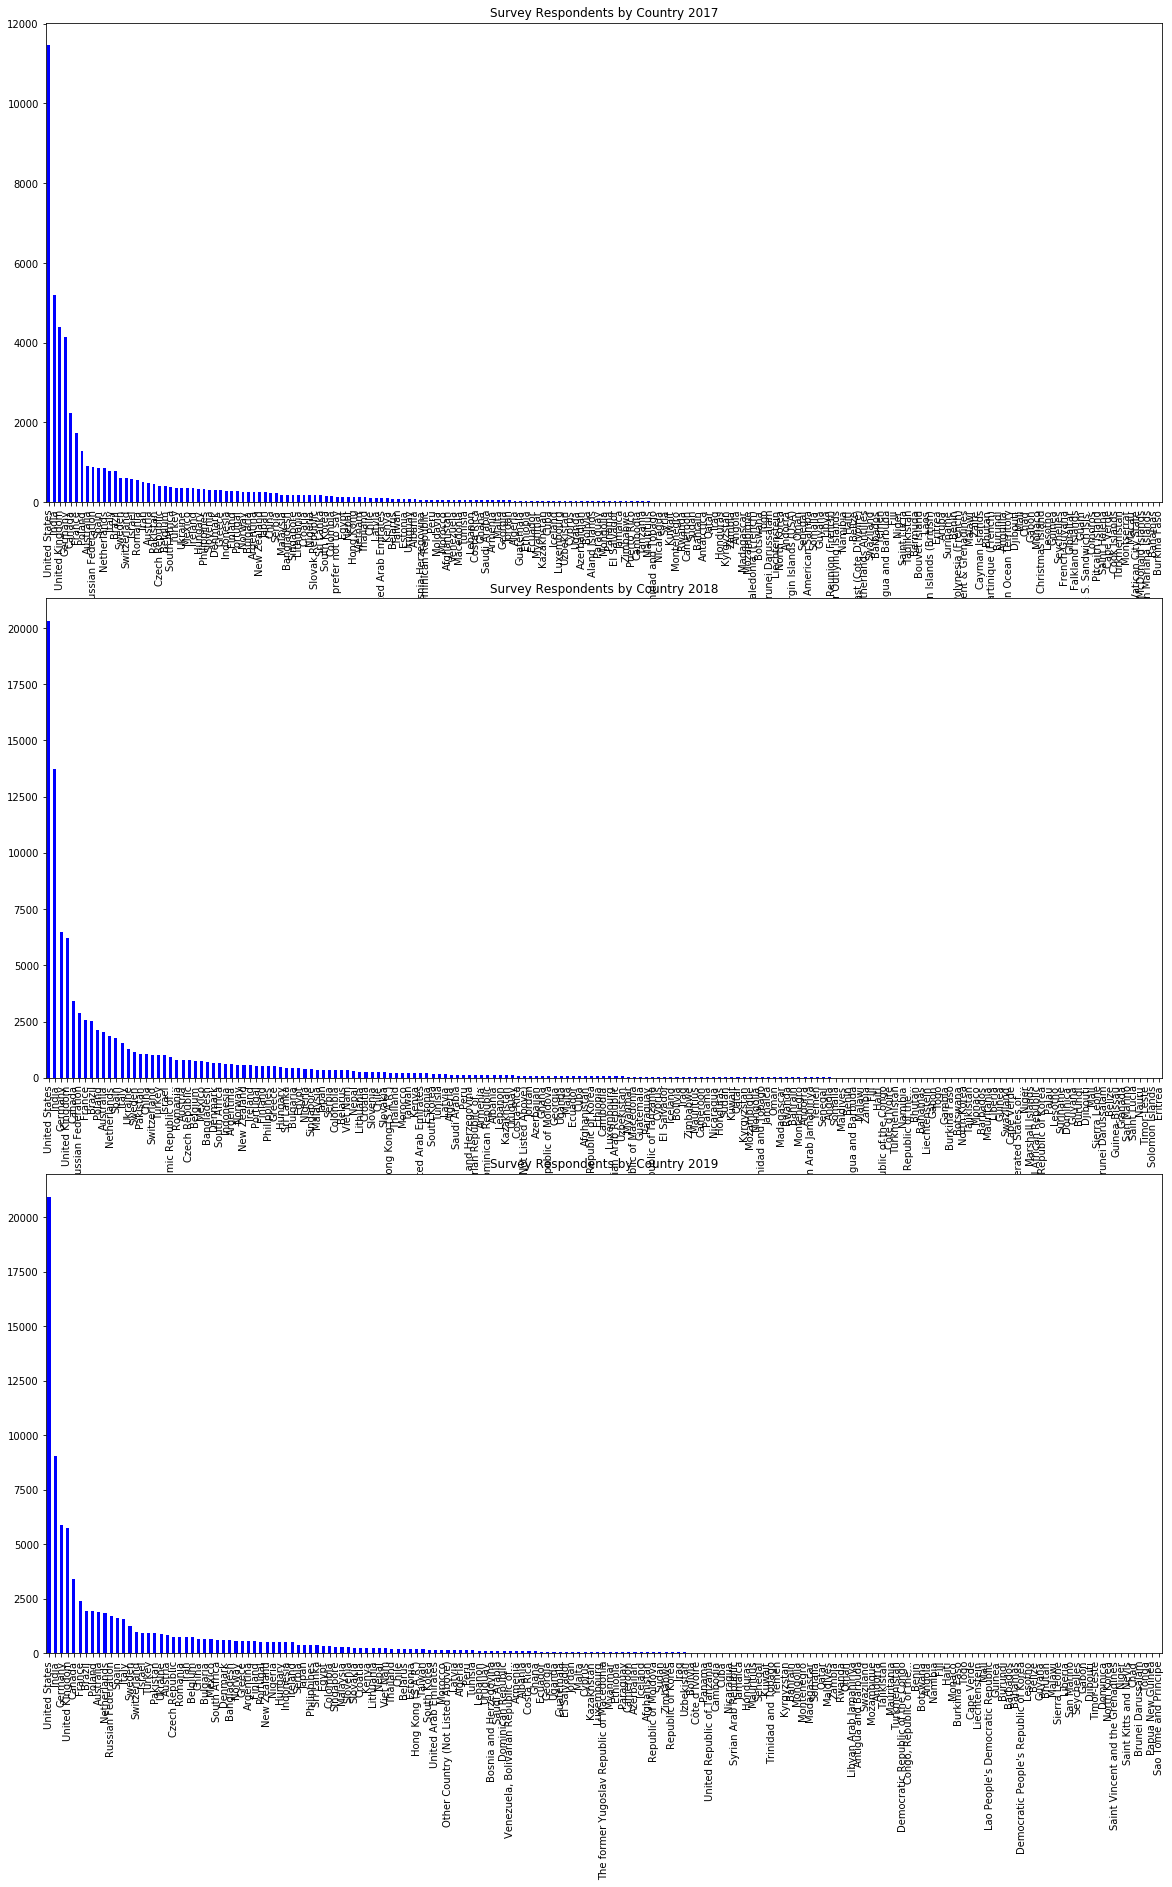

In [13]:
fig, axes = pyplot.subplots(nrows=3, ncols=1)


title = "Survey Respondents by Country"
so_2017["Country"].value_counts().plot.bar( figsize = (20,30), color = "blue", title = (title + " 2017"), ax =axes[0] )
title = "Survey Respondents by Country"
so_2018["Country"].value_counts().plot.bar( figsize = (20,30), color = "blue", title = (title + " 2018"), ax =axes[1] )
title = "Survey Respondents by Country"
so_2019["Country"].value_counts().plot.bar( figsize = (20,30), color = "blue", title = (title + " 2019"), ax =axes[2] )




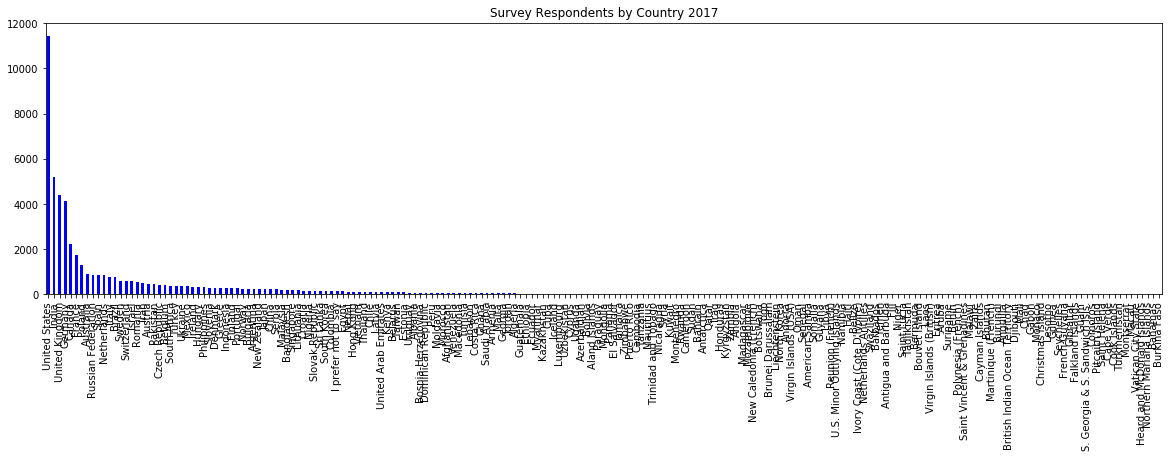

In [14]:
so_2017["Country"].value_counts().plot.bar( figsize = (20,5), color = "blue", title = (title + " 2017") );

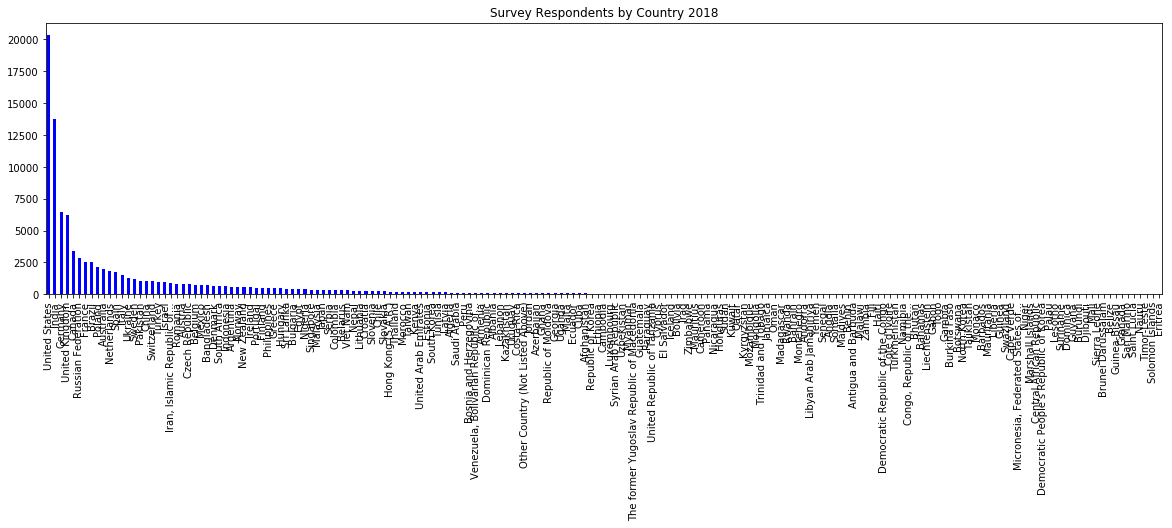

In [15]:
so_2018["Country"].value_counts().plot.bar( figsize = (20,5), color = "blue", title = (title + " 2018") );


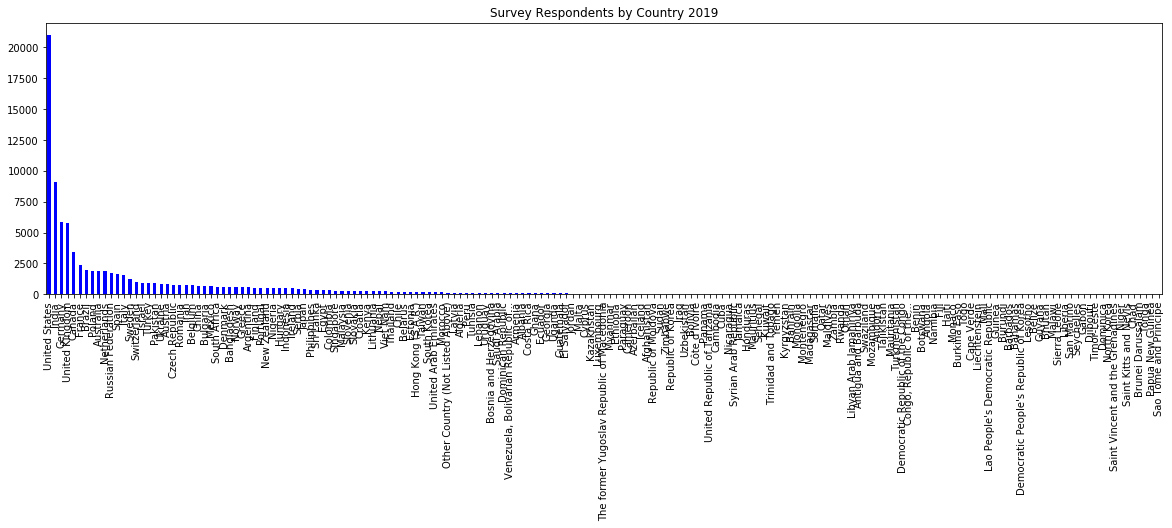

In [16]:
so_2019["Country"].value_counts().plot.bar( figsize = (20,5), color = "blue", title = (title + " 2019") );

In [17]:
 so_2019["MainBranch"].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

# Exploring the Languages Used For Each Year.

 The languages are stored in a string separated by semi-colons. This has led to a large numbers of permuations of strings.  This is made more reasonable by separating the languages and put into a user matrix. 
 

In [21]:
##  Find the breakdown of all the languages between the three datasets

language_set = set()

so_2019["LanguageWorkedWith"] = so_2019["LanguageWorkedWith"].fillna(value = '')
languages  = so_2019["LanguageWorkedWith"].str.strip().str.replace( r'; ', r';').str.split(";", expand = True)

for column in languages.columns:
    language_set= language_set.union(languages[column].unique())

    so_2018["LanguageWorkedWith"] = so_2018["LanguageWorkedWith"].fillna(value = '')
languages  = so_2018["LanguageWorkedWith"].str.strip().str.replace( r'; ', r';').str.split(";", expand = True)

for column in languages.columns:
    language_set= language_set.union(languages[column].unique())

so_2017["HaveWorkedLanguagev"] = so_2017["HaveWorkedLanguage"].apply(lambda s : str(s).strip(" "))
languages  = so_2017["HaveWorkedLanguage"].str.strip().str.replace( r'; ', r';').str.split(";", expand = True)

for column in languages.columns:
    language_set= language_set.union(languages[column].unique())

language_set.remove(numpy.nan)
language_set.remove("")
language_set.remove(None)
language_set = list(language_set)
language_set.sort()


print(language_set)

['Assembly', 'Bash/Shell', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'CSS', 'Clojure', 'Cobol', 'CoffeeScript', 'Common Lisp', 'Dart', 'Delphi/Object Pascal', 'Elixir', 'Erlang', 'F#', 'Go', 'Groovy', 'HTML', 'HTML/CSS', 'Hack', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lua', 'Matlab', 'Objective-C', 'Ocaml', 'Other(s):', 'PHP', 'Perl', 'Python', 'R', 'Ruby', 'Rust', 'SQL', 'Scala', 'Smalltalk', 'Swift', 'TypeScript', 'VB.NET', 'VBA', 'Visual Basic 6', 'WebAssembly']


In [23]:
# Create a user matrix. 
for l in language_set:
    so_2019[l] = so_2019["LanguageWorkedWith"].astype(str).apply(lambda lan: 0 if (l == numpy.nan) or (l not in lan.split(";")) else 1)
   
    so_2018[l] = so_2018["LanguageWorkedWith"].astype(str).apply(lambda lan: 0 if (l == numpy.nan) or (l not in lan.split(";")) else 1)
    
    so_2017[l] = so_2017["HaveWorkedLanguage"].astype(str).apply(lambda lan: 0 if (l == numpy.nan) or (l not in lan.split(";")) else 1)


In [24]:
so_2018[language_set].head()

Assembly  Bash/Shell  Bash/Shell/PowerShell  C  C#  C++  CSS  Clojure  \
0         0           0                      0  0   0    0    1        0   
1         0           1                      0  0   0    0    0        0   
2         0           0                      0  0   0    0    0        0   
3         0           1                      0  0   1    0    1        0   
4         0           1                      0  1   0    1    0        0   

   Cobol  CoffeeScript     ...       Rust  SQL  Scala  Smalltalk  Swift  \
0      0             0     ...          0    0      0          0      0   
1      0             0     ...          0    0      0          0      0   
2      0             0     ...          0    0      0          0      0   
3      0             0     ...          0    1      0          0      0   
4      0             0     ...          0    1      0          0      0   

   TypeScript  VB.NET  VBA  Visual Basic 6  WebAssembly  
0           0       0    0               0            0  
1           0       0    0               0            0  
2           0       0    0               0            0  
3           1       0    0               0            0  
4           0       0    0               0            0  

[5 rows x 46 columns]

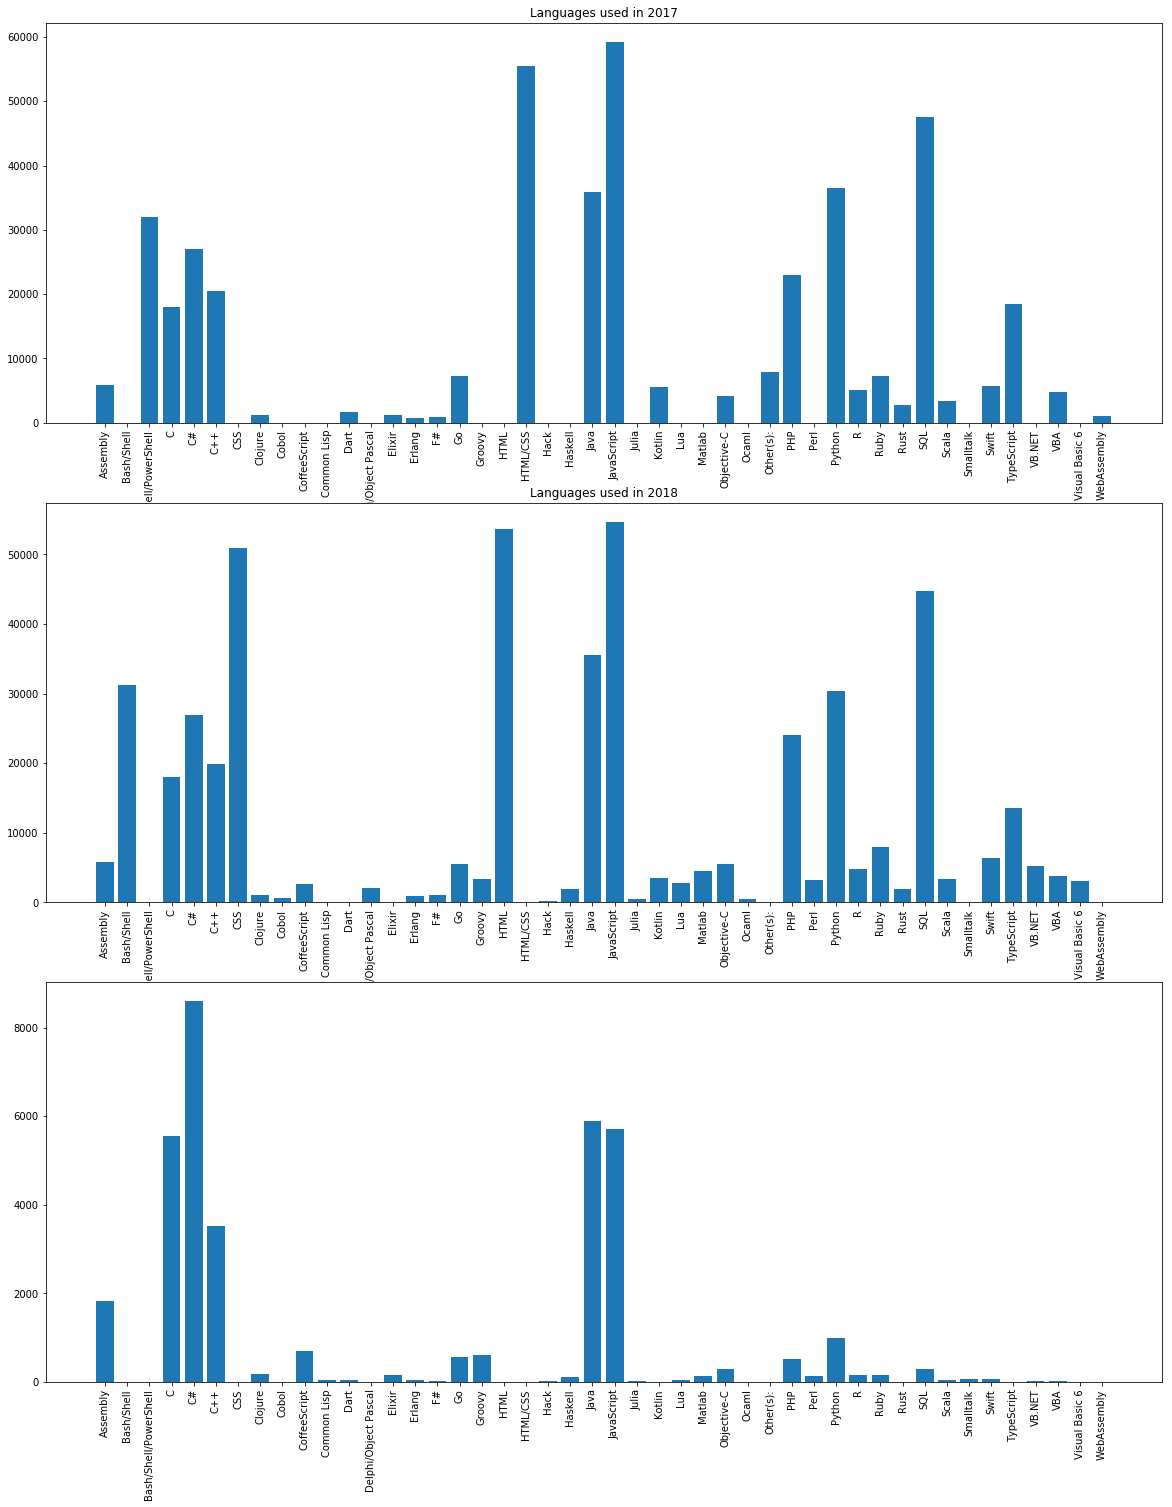

In [25]:
fig , axes  = pyplot.subplots(nrows=3, ncols=1, figsize= (20,25))


axes[0].set_xticklabels(language_set, rotation = "vertical")
axes[0].bar(x = language_set, height = so_2019[language_set].sum())
axes[0].set_title("Languages used in 2019")
axes[1].bar(x = language_set, height = so_2018[language_set].sum())
axes[1].set_xticklabels(language_set, rotation = "vertical")
axes[1].set_title("Languages used in 2018")
axes[2].bar(x = language_set, height = so_2017[language_set].sum())
axes[2].set_xticklabels(language_set, rotation = "vertical")
axes[0].set_title("Languages used in 2017");

In [27]:
def compute_salaries(country_name):
    data_frame  = pandas.DataFrame()
    data_frame[2017] =  so_2017[so_2017["Country"]== country_name]["Salary"]
    data_frame[2018] =  so_2018[so_2018["Country"]== country_name]["Salary"]
    data_frame[2019] =  so_2019[so_2019["Country"]== country_name]["CompTotal"]
    #data_frame[2018] = data_frame[2018].str.replace(r',', r'').apply(lambda v2018: float(v2018) if type(v2018)==str else v2018)
    #data_frame[2018] = data_frame[2018].astype(float)

    return data_frame



In [29]:
US_salaries = compute_salaries("United States")
US_salaries.describe()

2017          2018          2019
count    3781.000000  1.851000e+03  1.947000e+03
mean    96194.754635  1.022271e+05  6.291749e+05
std     34866.067035  6.205867e+04  2.266055e+07
min         5.000000  0.000000e+00  0.000000e+00
25%     70000.000000  7.300000e+04  7.500000e+04
50%     93000.000000  9.850000e+04  1.030000e+05
75%    120000.000000  1.250000e+05  1.400000e+05
max    197000.000000  1.850000e+06  1.000000e+09

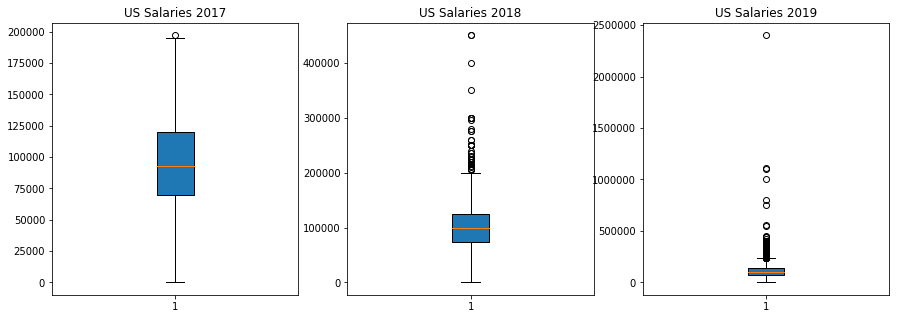

In [82]:
fig, axes = pyplot.subplots(nrows= 1, ncols=3 , figsize = (15,5))

axes[0].boxplot(US_salaries[2017].dropna(), vert= True,  patch_artist = True)
axes[0].set_title("US Salaries 2017")
axes[1].boxplot(US_salaries[2018].dropna(), vert=True ,patch_artist=True)
axes[1].set_title("US Salaries 2018")
axes[2].boxplot(US_salaries[2019].dropna(), vert=True ,patch_artist=True)
axes[2].set_title("US Salaries 2019");



The outliers in the last two years are massively skewing the data.  Remove them to get a better interpretation of the remaining data

Text(0.5,1,'US Salaries 2019')

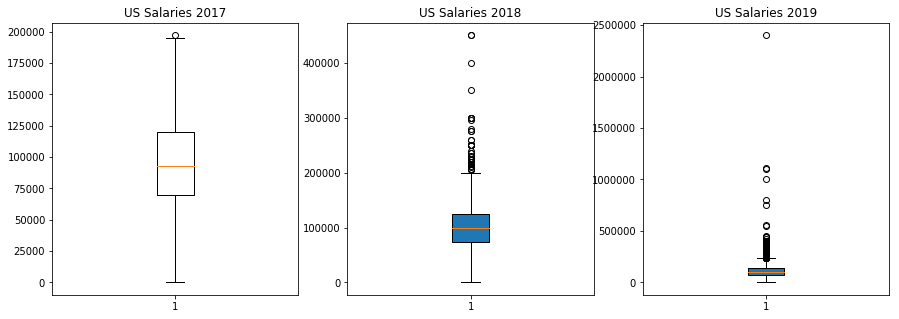

In [57]:

US_salaries[2018] = US_salaries[2018][US_salaries[2018] != US_salaries[2018].max()]
US_salaries[2019] = US_salaries[2019][US_salaries[2019] != US_salaries[2019].max()]


fig, axes = pyplot.subplots(nrows= 1, ncols=3 , figsize = (15,5))

axes[0].boxplot(US_salaries[2017].dropna())
axes[0].set_title("US Salaries 2017")
axes[1].boxplot(US_salaries[2018].dropna(), vert=True ,patch_artist=True)
axes[1].set_title("US Salaries 2018")
axes[2].boxplot(US_salaries[2019].dropna(), vert=True ,patch_artist=True)
axes[2].set_title("US Salaries 2019")

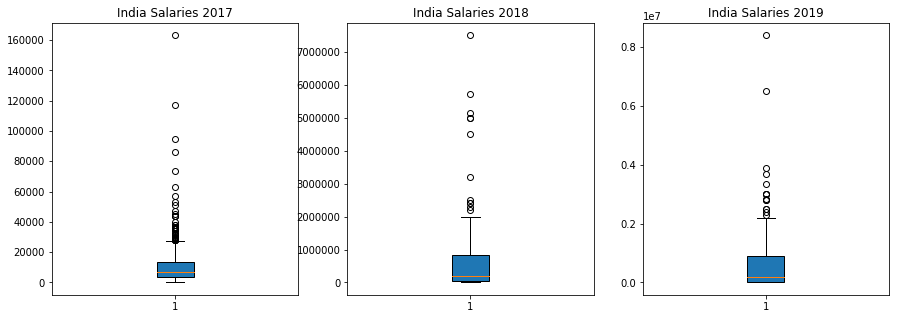

In [59]:

India_salaries  = compute_salaries("India")

fig, axes = pyplot.subplots(nrows= 1, ncols=3 , figsize = (15,5))

axes[0].boxplot(India_salaries[2017].dropna(), vert=True, patch_artist= True)
axes[0].set_title("India Salaries 2017")
axes[1].boxplot(India_salaries[2018].dropna(), vert=True ,patch_artist=True)
axes[1].set_title("India Salaries 2018")
axes[2].boxplot(India_salaries[2019].dropna(), vert=True ,patch_artist=True)
axes[2].set_title("India Salaries 2019");


In [83]:
US_salaries.describe()

2017           2018          2019
count    3781.000000    1850.000000  1.946000e+03
mean    96194.754635  101282.361027  1.156236e+05
std     34866.067035   46908.217940  9.382204e+04
min         5.000000       0.000000  0.000000e+00
25%     70000.000000   73000.000000  7.500000e+04
50%     93000.000000   98250.000000  1.030000e+05
75%    120000.000000  125000.000000  1.400000e+05
max    197000.000000  450000.000000  2.400000e+06

In [84]:
India_salaries.describe()


2017          2018          2019
count     821.000000  2.610000e+02  2.220000e+02
mean    10318.860802  6.084457e+05  6.544518e+05
std     12061.448951  9.739026e+05  1.041373e+06
min         0.000000  0.000000e+00  7.000000e+00
25%      3523.711643  3.000000e+04  2.529775e+04
50%      7047.423286  2.000000e+05  1.875000e+05
75%     13213.918661  8.330000e+05  9.000000e+05
max    163134.796652  7.500000e+06  8.400000e+06

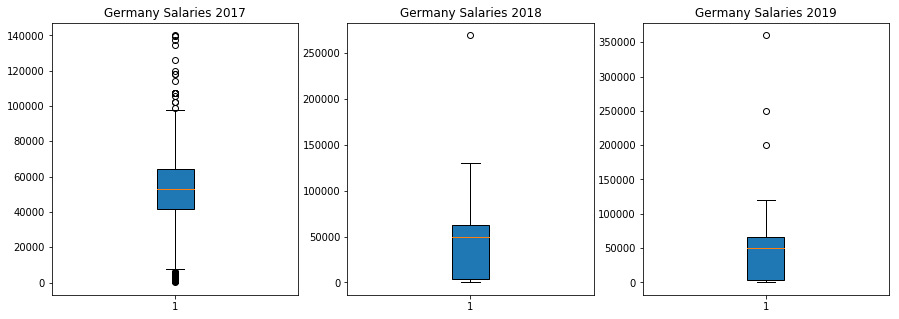

In [62]:
DE_salaries  = compute_salaries("Germany")

fig, axes = pyplot.subplots(nrows= 1, ncols=3 , figsize = (15,5))

axes[0].boxplot(DE_salaries[2017].dropna(), vert = True, patch_artist = True)
axes[0].set_title("Germany Salaries 2017")
axes[1].boxplot(DE_salaries[2018].dropna(), vert=True ,patch_artist=True)
axes[1].set_title("Germany Salaries 2018")
axes[2].boxplot(DE_salaries[2019].dropna(), vert=True ,patch_artist=True)
axes[2].set_title("Germany Salaries 2019");


In [85]:
DE_salaries.describe()

2017           2018           2019
count     994.000000     190.000000     180.000000
mean    51616.301032   40959.173684   45007.905556
std     21880.479843   35067.682870   43878.414309
min        64.516129       4.000000       0.000000
25%     41683.870968    4115.250000    4187.500000
50%     52903.225806   50000.000000   50000.000000
75%     64516.129032   62000.000000   66000.000000
max    140000.000000  268882.000000  360000.000000